<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC), Sam Stack (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Billboard data CSV:
billboard_csv = './datasets/billboard.csv'

In [2]:
df = pd.read_csv(billboard_csv)

In [3]:
df.columns

Index([u'year', u'artist.inverted', u'track', u'time', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.week         210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 no

In [5]:
df.describe(include='all')

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317,317,317,317,317,317,317.000000,312.000000,307.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,228,316,126,10,68,53,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jay-Z,Where I Wanna Be,3:50,Rock,2000-01-29,2000-12-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,2,9,137,11,17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,79.958991,71.173077,65.045603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,NaN,14.686865,18.200443,20.752302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,8.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,74.000000,63.000000,53.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,81.000000,73.000000,66.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,84.000000,79.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(axis=1,how='all', inplace=True)

In [7]:
col = list(df.columns.values)

In [8]:
meltdf = pd.melt(df, id_vars=col[:7], value_vars=col[7:], var_name='week')
meltdf.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,value
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


In [9]:
meltdf['week'] = meltdf['week'].str.replace('[a-z.]', '').astype(float)

In [10]:
meltdf.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,value
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1.0,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1.0,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1.0,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1.0,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1.0,57.0


In [11]:
meltdf['date.entered'] = pd.to_datetime(meltdf['date.entered'])
meltdf['date.peaked'] = pd.to_datetime(meltdf['date.peaked'])


In [12]:
col = ['year','artist','track','time','genre','date_enter','date_peak','week','peak_rank']
meltdf.columns = col
meltdf.head()

,year,artist,track,time,genre,date_enter,date_peak,week,peak_rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1.0,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1.0,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1.0,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1.0,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1.0,57.0


In [13]:
#remove weeks where track is not on billboard
df2 = meltdf[~meltdf['peak_rank'].isnull()]
#find top 10 tracks that stayed the longest on the billboard
df2.groupby(['artist','track']).max()['week'].sort_values(ascending=False).head(10)

artist            track                     
Creed             Higher                        65.0
Lonestar          Amazed                        64.0
Hill, Faith       Breathe                       53.0
3 Doors Down      Kryptonite                    53.0
Creed             With Arms Wide Open           47.0
Joe               I Wanna Know                  44.0
Vertical Horizon  Everything You Want           41.0
matchbox twenty   Bent                          39.0
Braxton, Toni     He Wasn't Man Enough          37.0
Nelly             (Hot S**t) Country Grammar    34.0
Name: week, dtype: float64

In [31]:
df2['daystopeak'] = (pd.to_datetime(df2['date_peak']) - pd.to_datetime(df2['date_enter']))
df2['daystopeak'] = df2['daystopeak'].apply(lambda x: x.days)
df2['daystopeak'].head()

C:\Users\Samson\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Samson\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    56
1    56
2    98
3    35
4    70
Name: daystopeak, dtype: int64

In [32]:
print df2[df2['daystopeak'] == 0].nunique()
#19 tracks and artists were on the billboard within one day of the launch
df2[df2['daystopeak'] == 0][['artist','track','genre']].drop_duplicates() 

year           1
artist        19
track         19
time          17
genre          5
date_enter    17
date_peak     17
week           8
peak_rank     29
daystopeak     1
dtype: int64


,artist,track,genre
114,"Carey, Mariah",Crybaby,Rock
175,Pearl Jam,Nothing As It Seems,Rock
232,Nine Days,If I Am,Rock
243,Q-Tip,Breathe And Stop,Rock
247,"Wallflowers, The",Sleepwalker,Rock
259,"Clark, Terri",A Little Gasoline,Country
271,"Estefan, Gloria",No Me Dejes De Querer,Rock
282,"Hollister, Dave",Can't Stay,Rock
299,En Vogue,Riddle,Rock
301,Anastacia,I'm Outta Love,Pop


In [15]:
#top 10 tracks that has the highest avg rank whilst on the billboard
df2.groupby(['artist','track']).mean().sort_values('peak_rank').head(10)

,,year,week,peak_rank
artist,track,,,
Santana,"Maria, Maria",2000,13.5,10.500000
Madonna,Music,2000,12.5,13.458333
N'Sync,Bye Bye Bye,2000,12.0,14.260870
"Elliott, Missy ""Misdemeanor""",Hot Boyz,2000,11.0,14.333333
Destiny's Child,Independent Women Part I,2000,14.5,14.821429
"Iglesias, Enrique",Be With You,2000,10.5,15.850000
Aaliyah,Try Again,2000,16.5,16.656250
Savage Garden,I Knew I Loved You,2000,17.0,17.363636
"Houston, Whitney",My Love Is Your Love,2000,14.5,17.857143


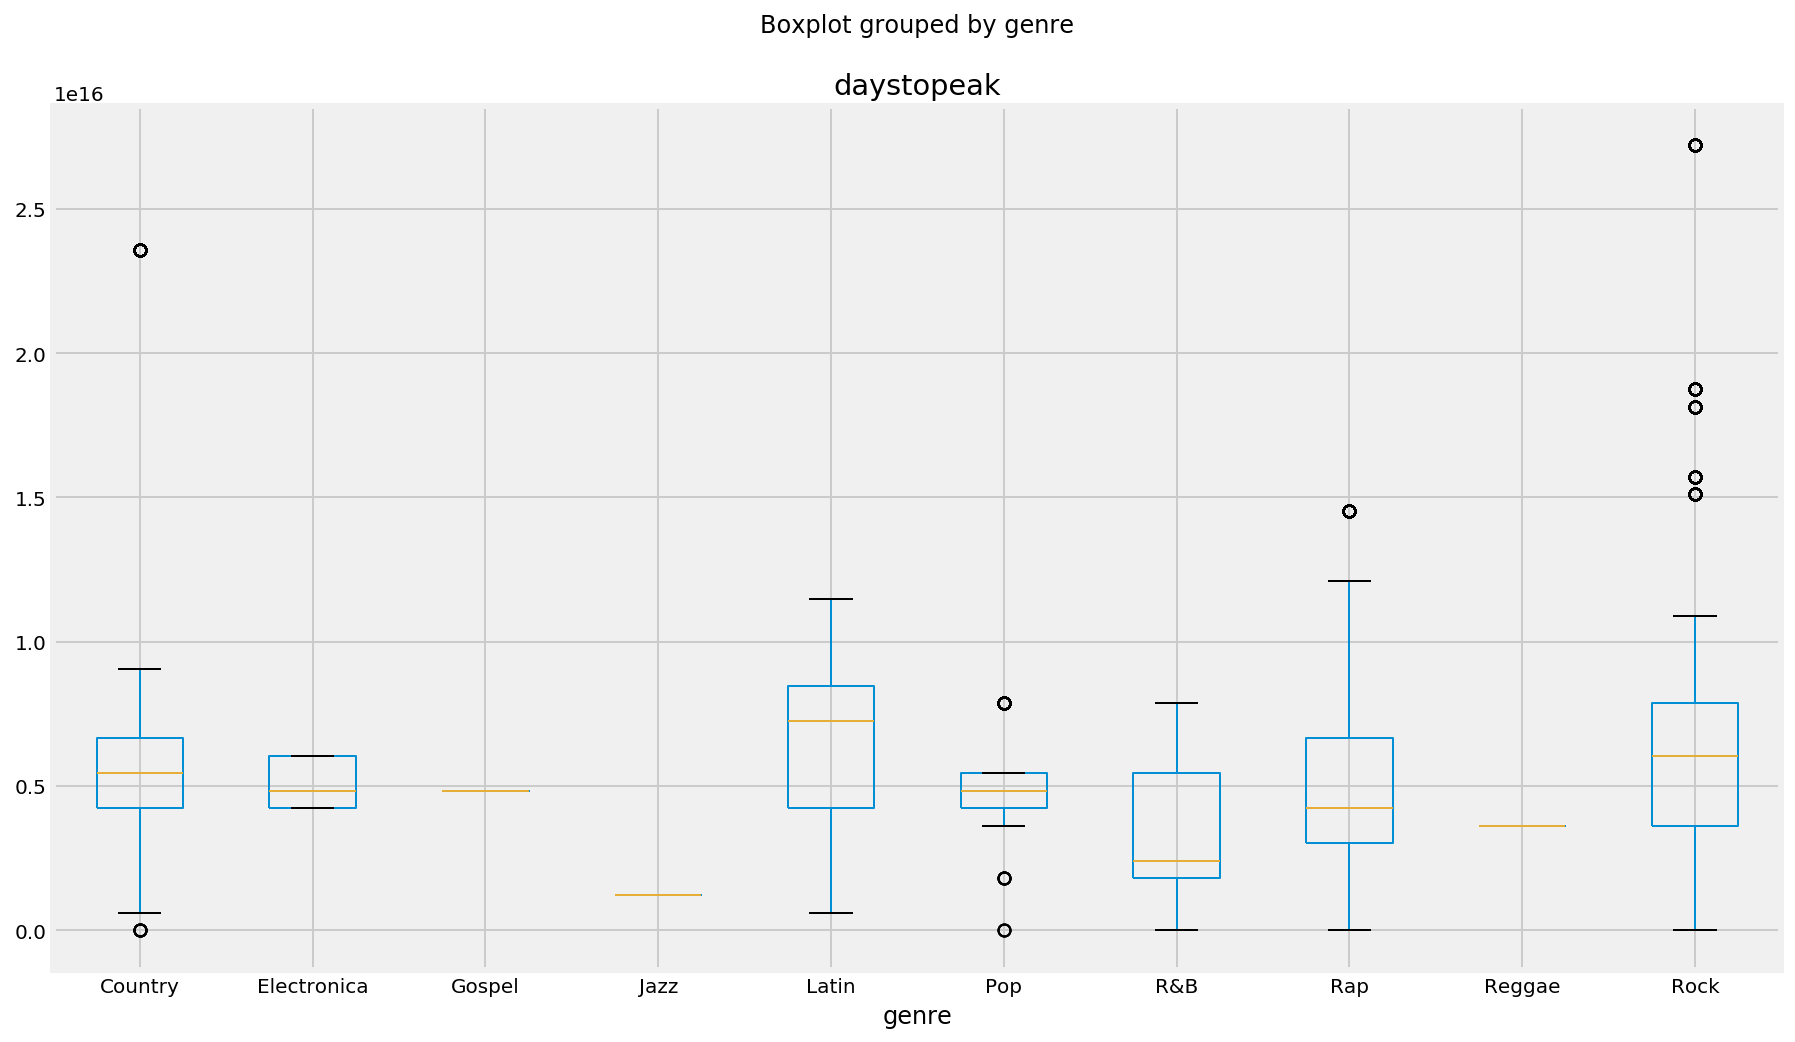

In [16]:
df2.boxplot(column='daystopeak', by='genre', figsize=(15,8))

In [17]:
df2[df2['genre'] == 'Jazz']

,year,artist,track,time,genre,date_enter,date_peak,week,peak_rank,daystopeak
49,2000,Kenny G,Auld Lang Syne (The Millenium Mix),7:50,Jazz,1999-12-25,2000-01-08,1.0,89.0,14 days
366,2000,Kenny G,Auld Lang Syne (The Millenium Mix),7:50,Jazz,1999-12-25,2000-01-08,2.0,89.0,14 days
683,2000,Kenny G,Auld Lang Syne (The Millenium Mix),7:50,Jazz,1999-12-25,2000-01-08,3.0,7.0,14 days
1000,2000,Kenny G,Auld Lang Syne (The Millenium Mix),7:50,Jazz,1999-12-25,2000-01-08,4.0,8.0,14 days
1317,2000,Kenny G,Auld Lang Syne (The Millenium Mix),7:50,Jazz,1999-12-25,2000-01-08,5.0,66.0,14 days


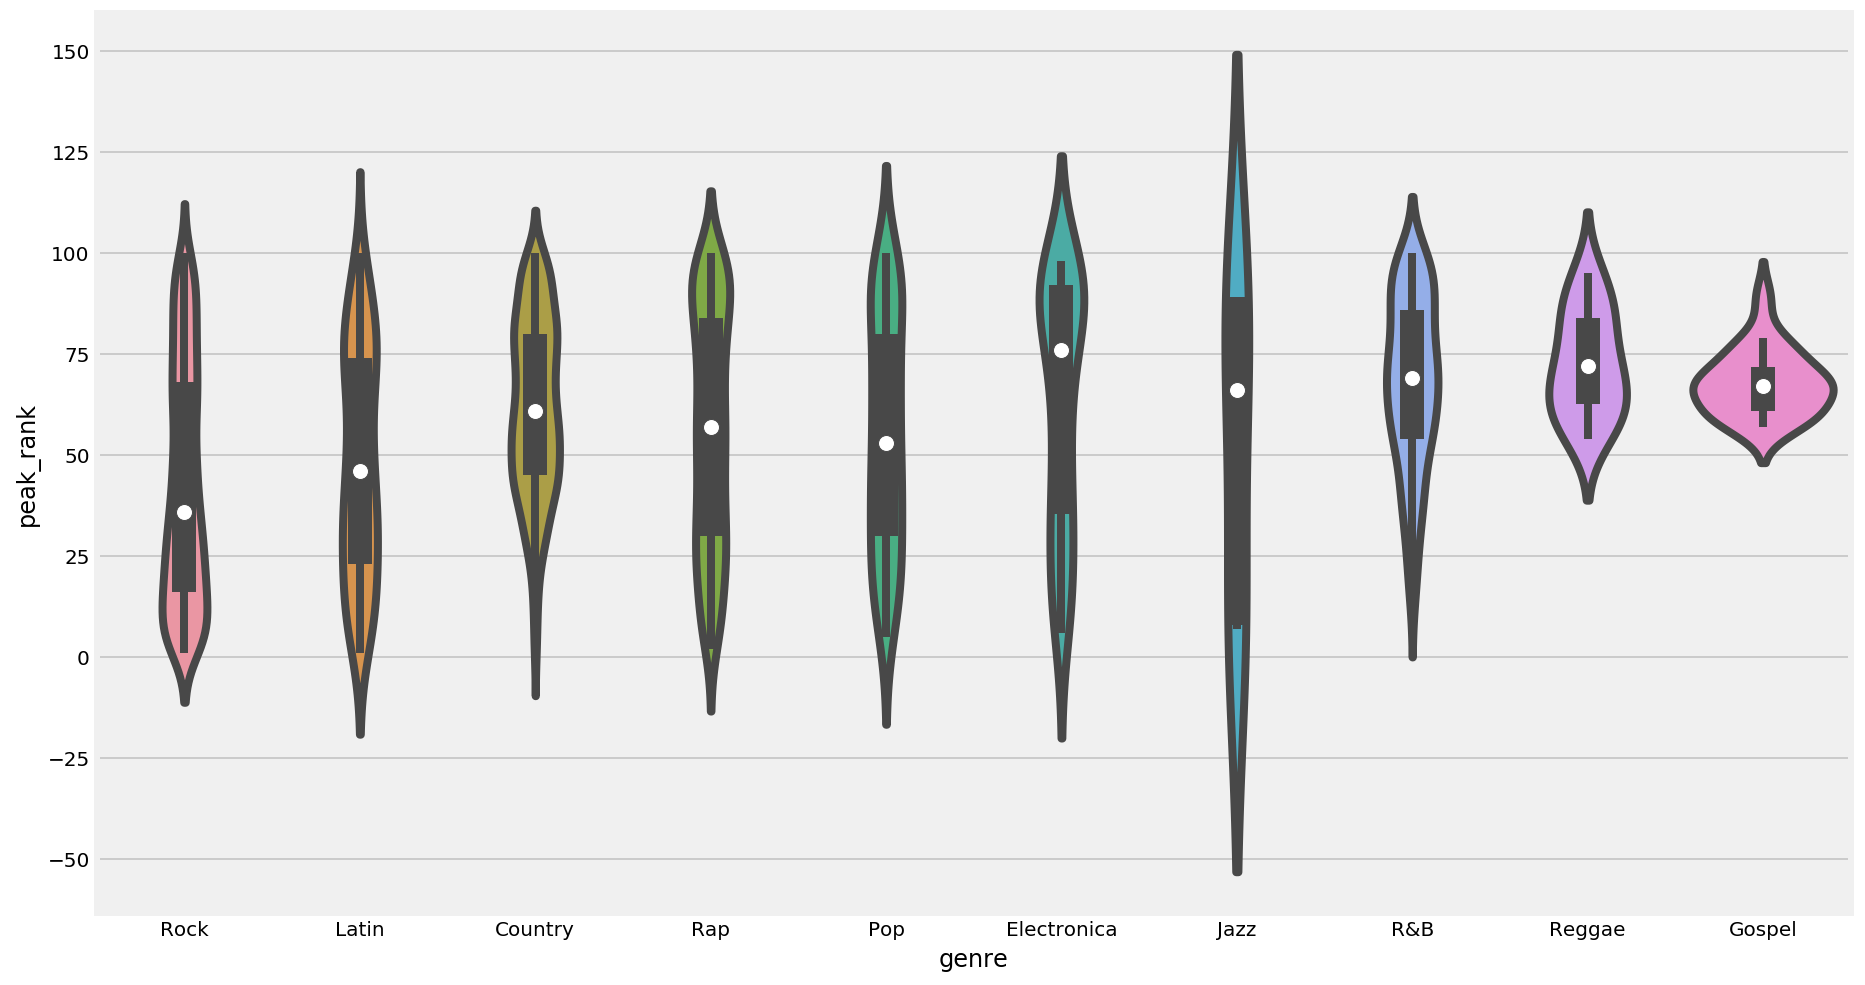

In [18]:
fig, ax = plt.subplots()

fig.set_size_inches(14, 8.27)
sns.violinplot(x='genre', y='peak_rank', data=df2)

[]

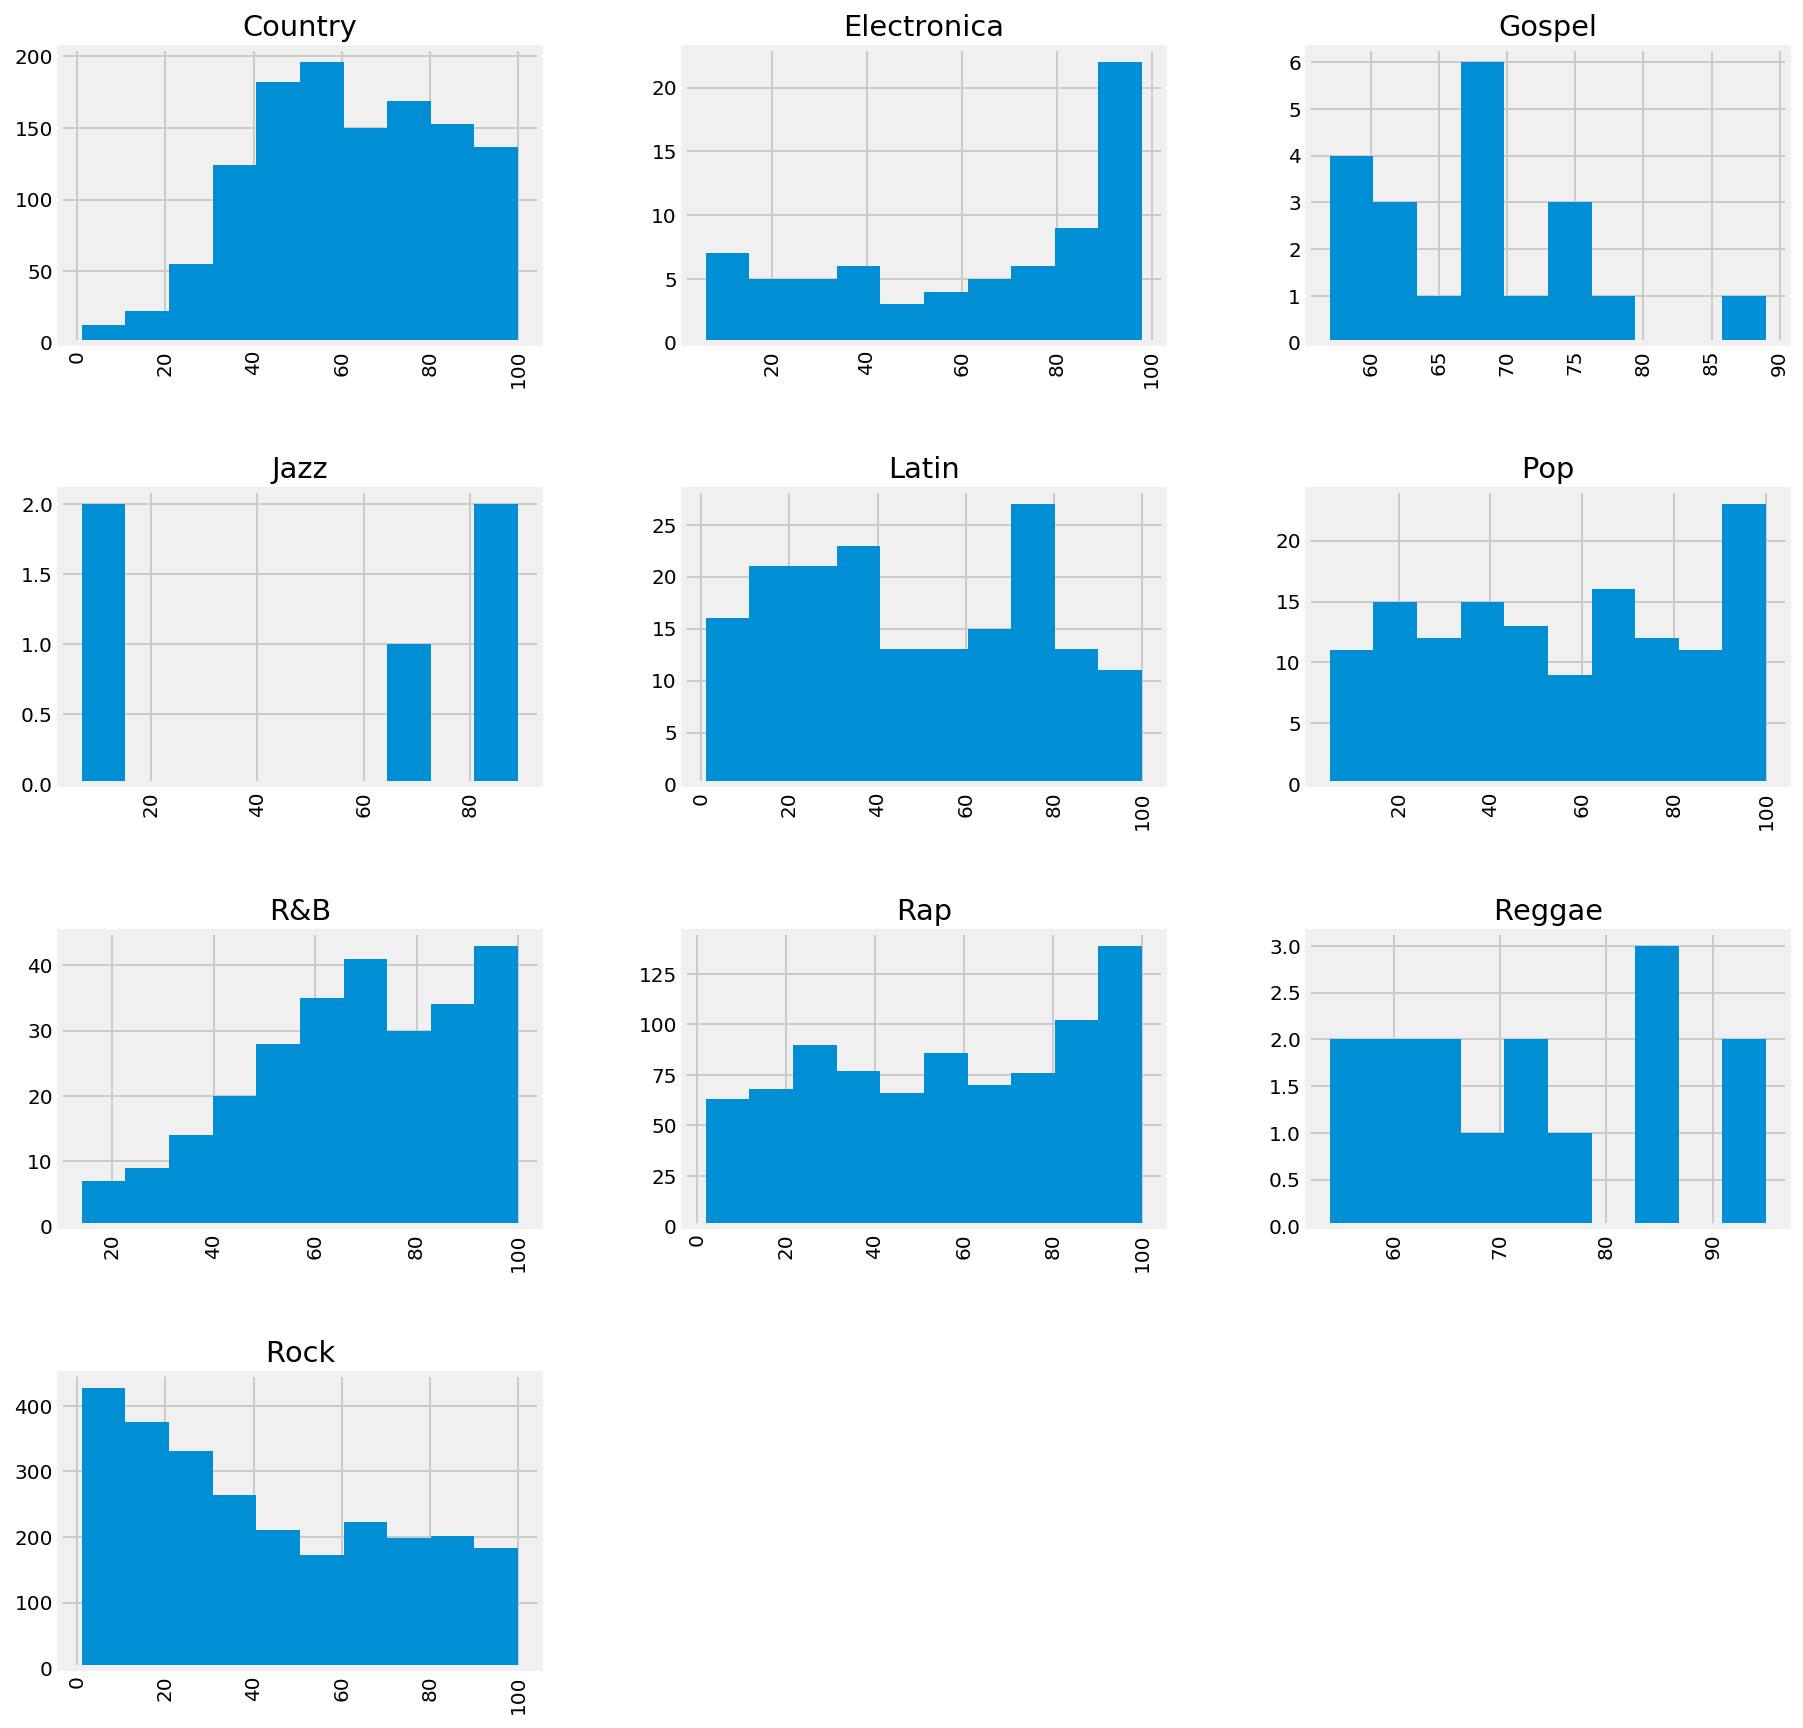

In [19]:
df2.hist(column='peak_rank', by='genre', figsize=(15,15))
plt.plot()

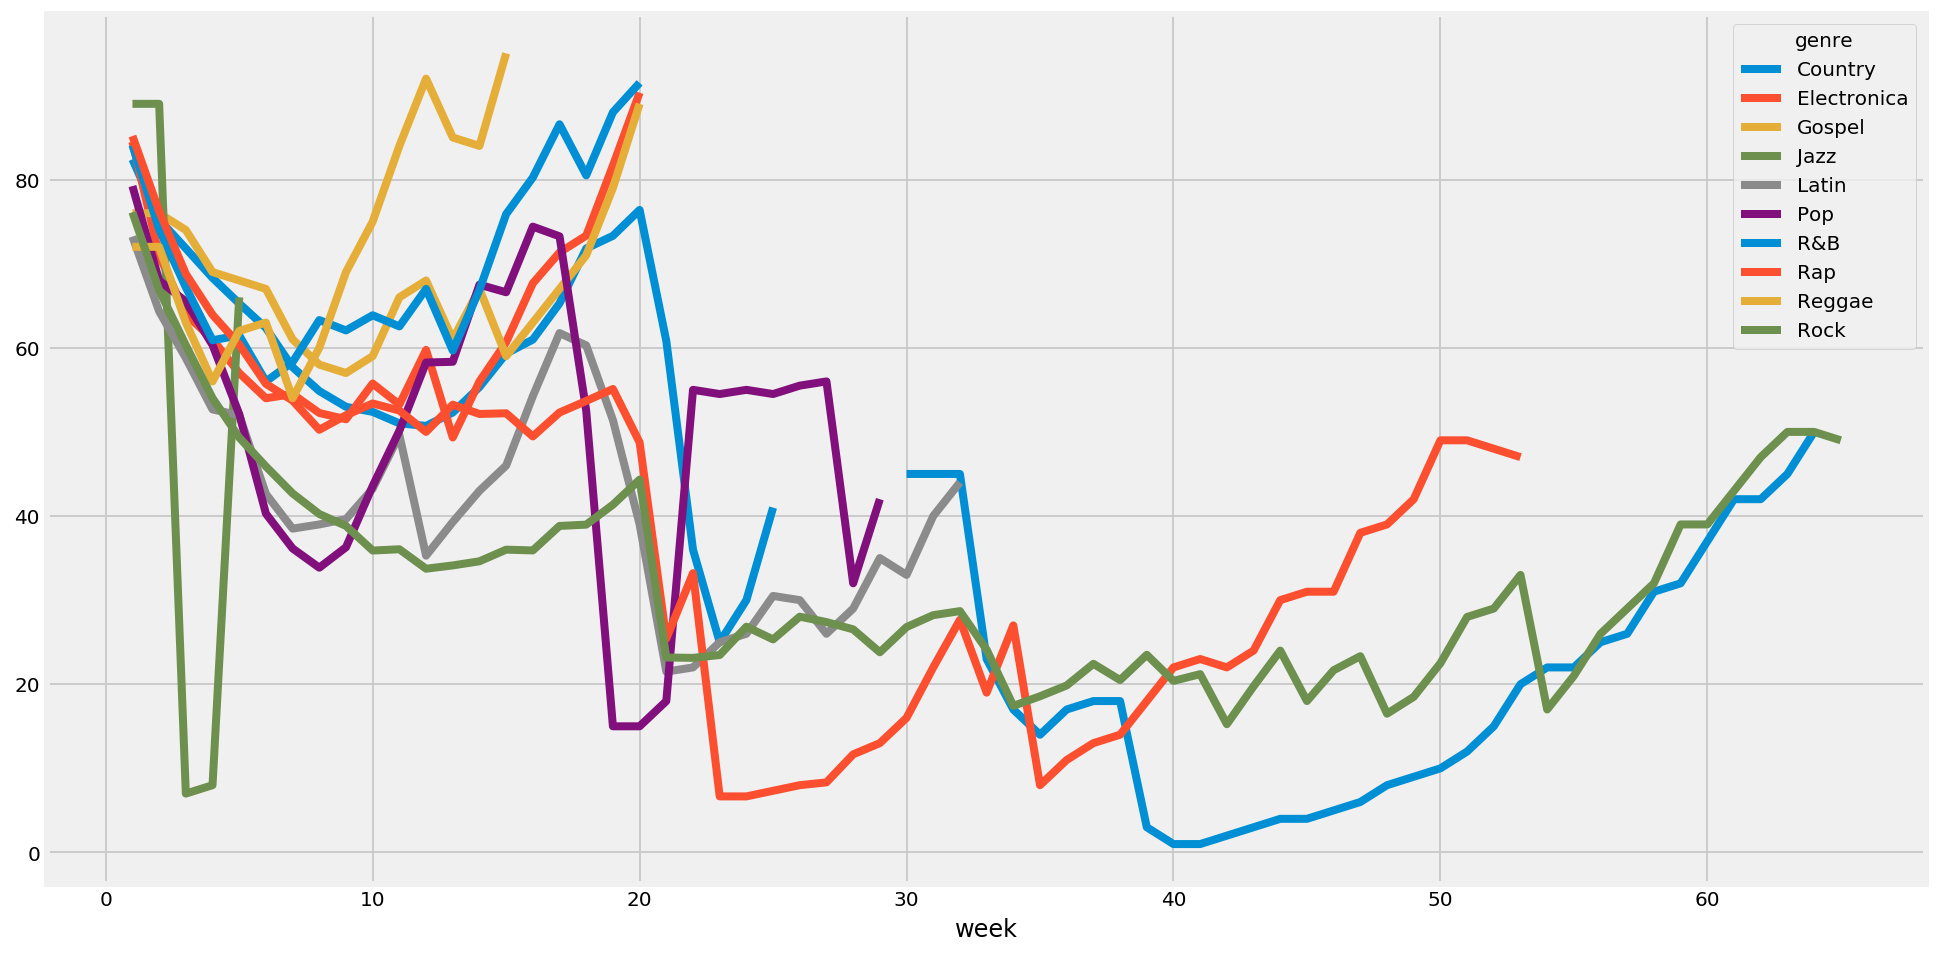

In [20]:
df2.groupby(['week','genre'])['peak_rank'].mean().unstack().plot(figsize=(15,8))

In [21]:
df2.to_csv('df2.csv')

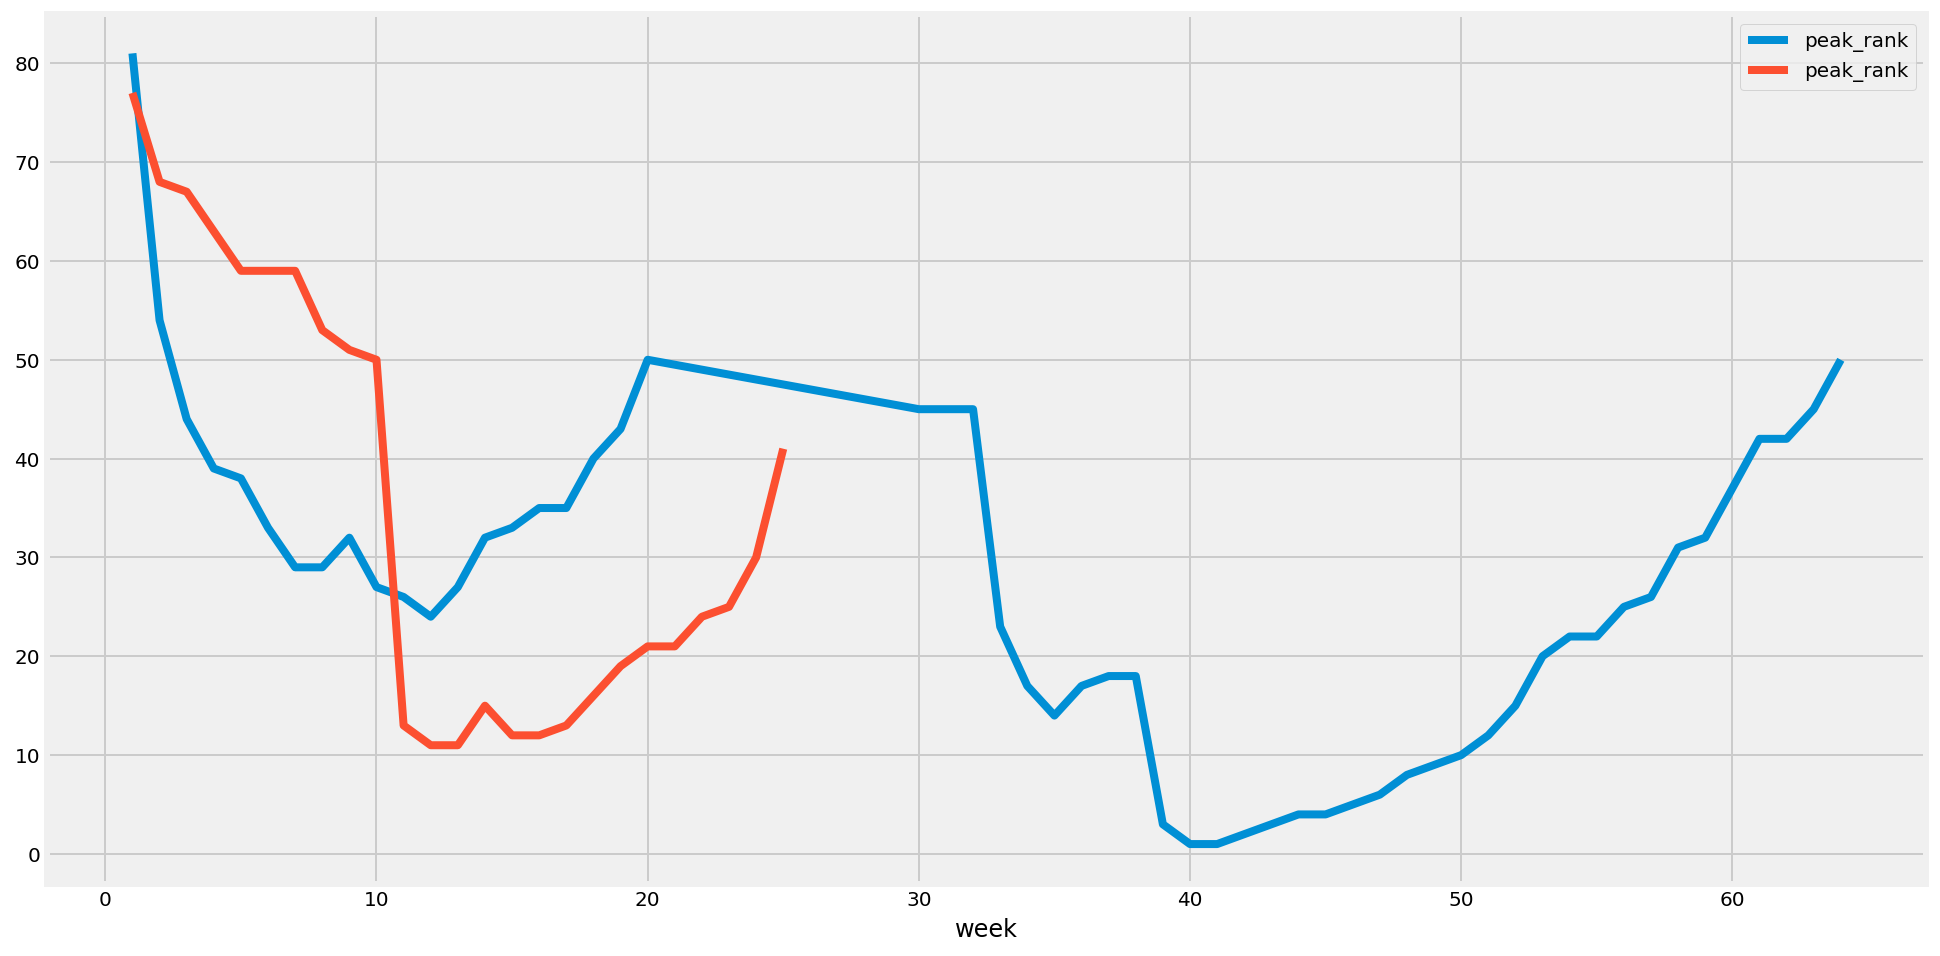

In [53]:
ax = df2[(df2['genre']=='Country') & (df2['track']=='Amazed')].plot(x='week',y='peak_rank', figsize=(15,8))
df2[(df2['genre']=='Country') & (df2['track']=='I Need You')].plot(x='week',y='peak_rank', figsize=(15,8), ax=ax)

In [65]:
Country = df2[df2['genre']=='Country']
Country['track'].unique()[0]

'Amazed'

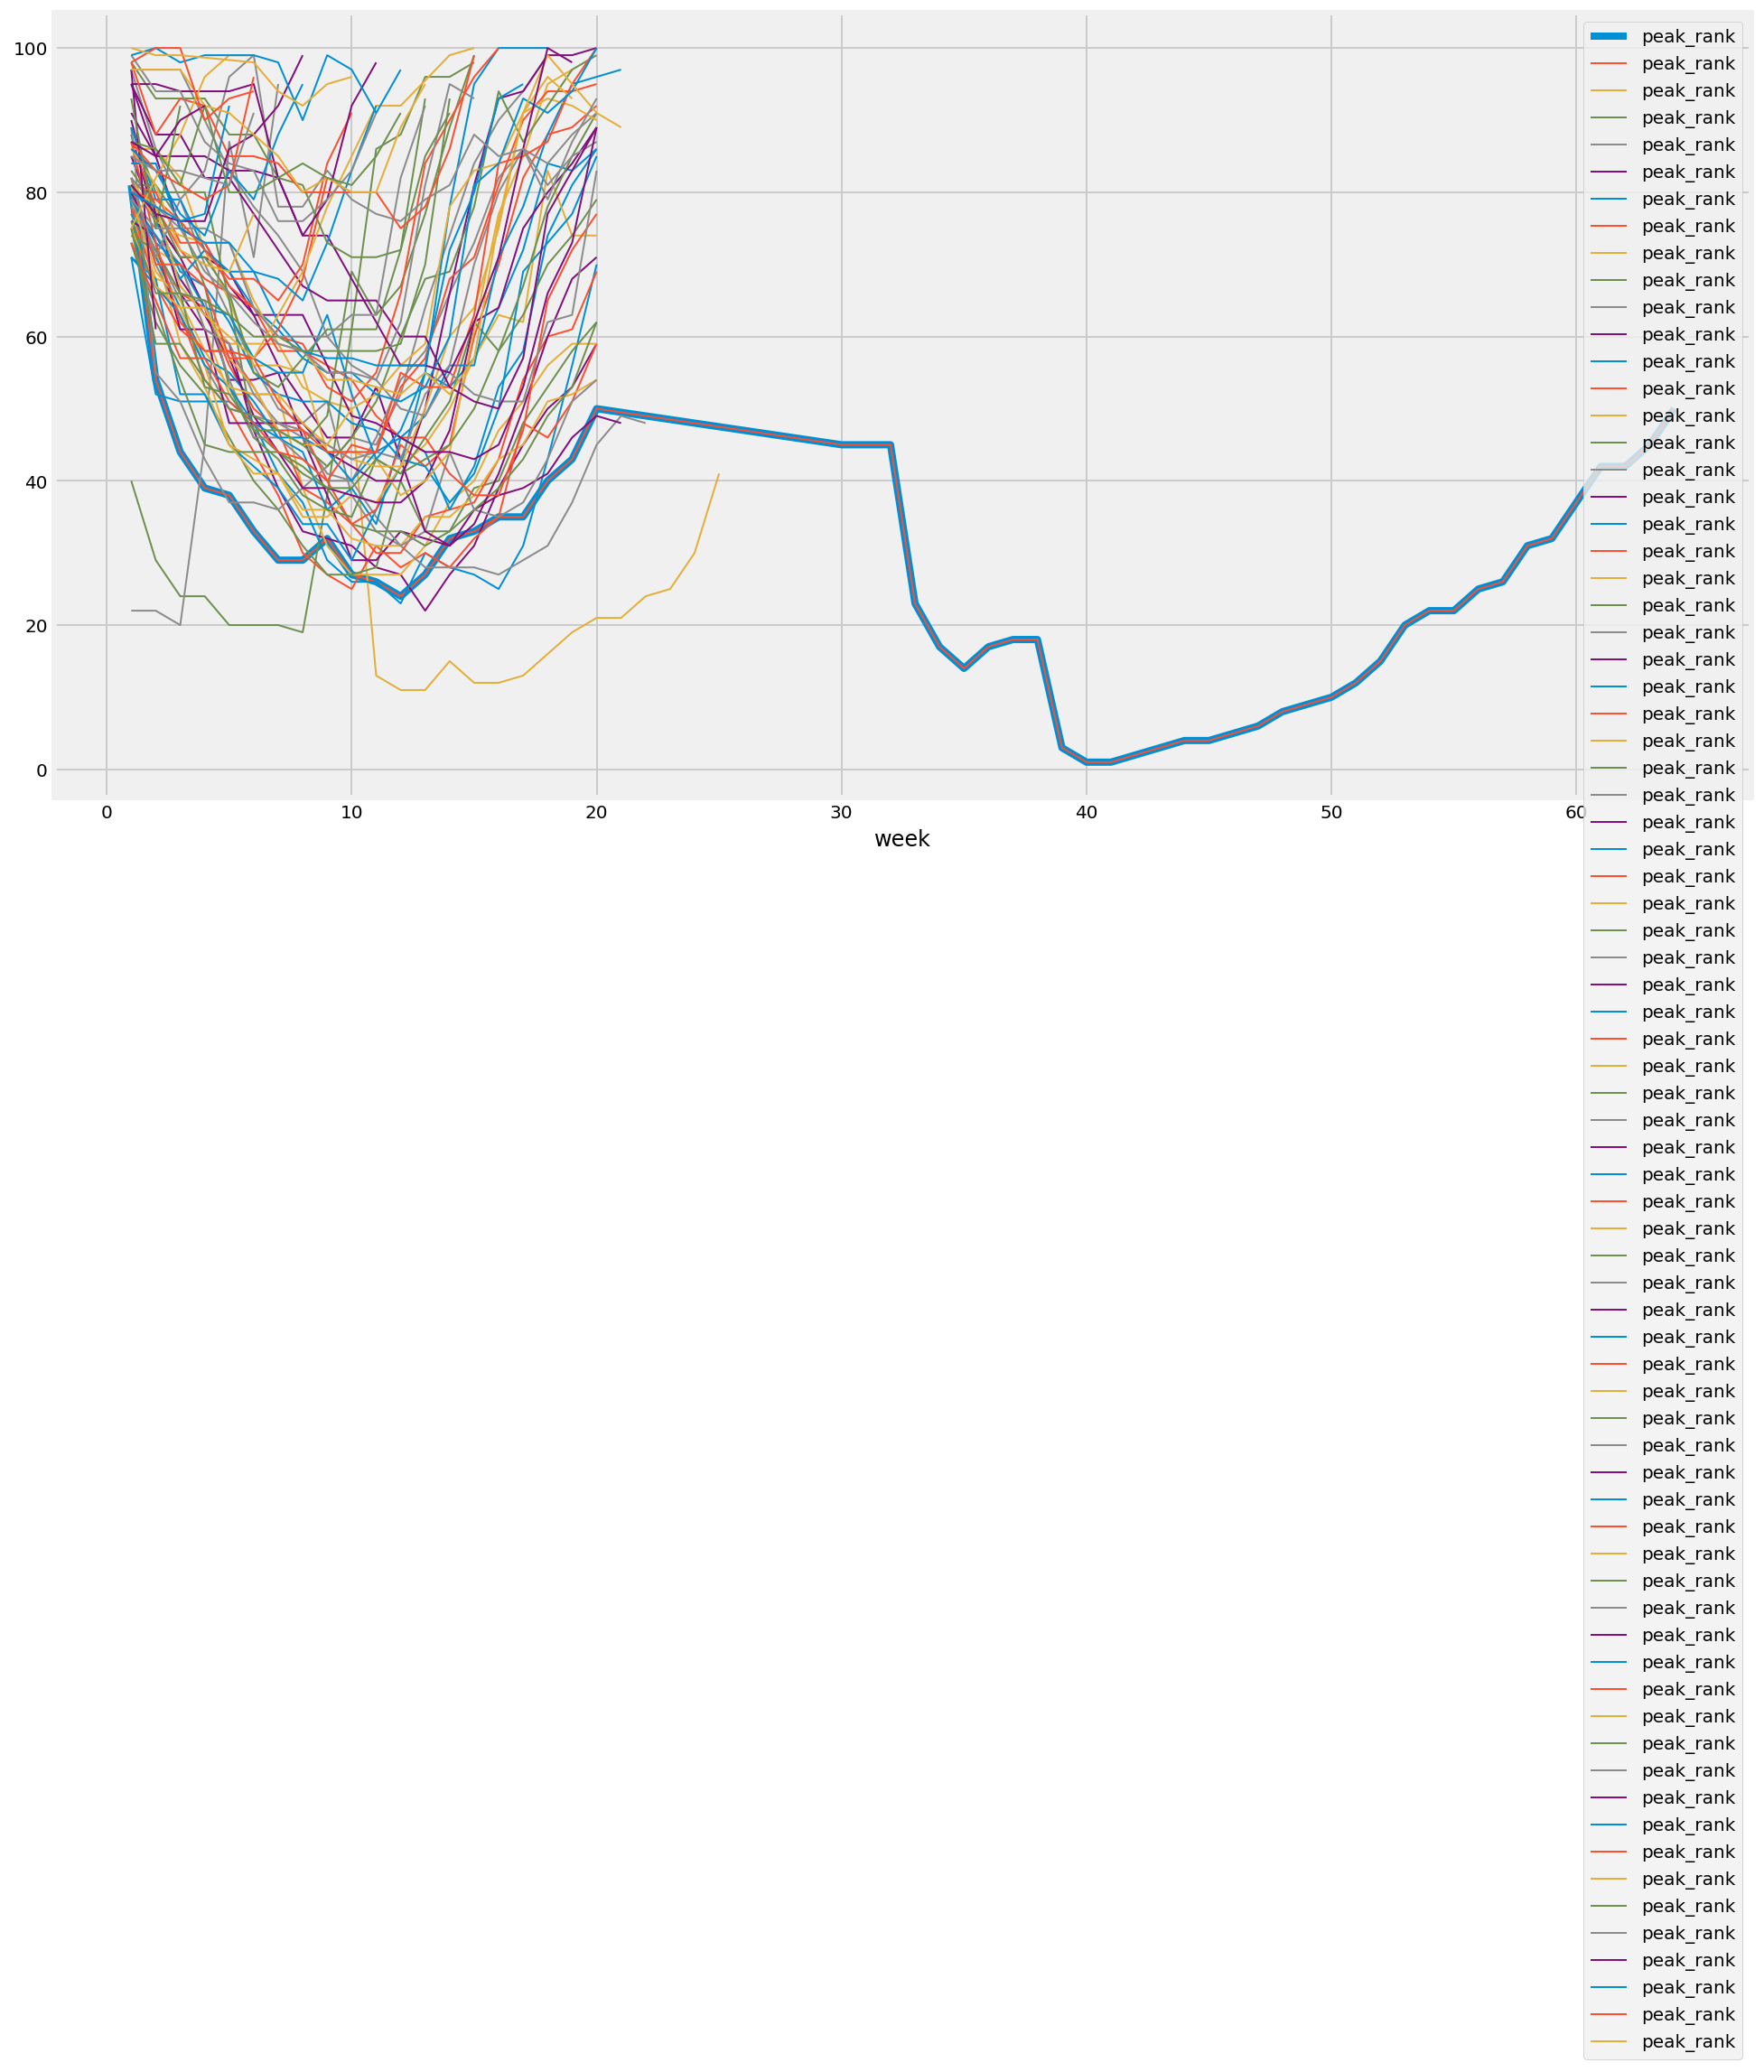

In [69]:
ax = Country[Country['track']==Country['track'].unique()[0]].plot(x='week',y='peak_rank', figsize=(15,8), lw=1)
for i in Country['track'].unique():
    Country[Country['track']==i].plot(x='week',y='peak_rank', figsize=(15,8), ax=ax, lw=1)
    plt.legend()